<h1 style="text-align: center; color: purple;" markdown="1">Econ 320 Python Lab  Multiple Linear Regression </h1>
<h2 style="text-align: center; color: purple;" markdown="1">Handout 5 </h2>

## Multiple Linear Regression 

In economics, you want to estimate models that have more than one explanatory variable like the model below: 

$$y=\beta_0 + \beta_1*x_1 + \beta_2*x_2 + \beta_3*x_3 + ... +\beta_n*x_n +  \mu$$

When you solve for the $\beta's$ by using OLS you get the following formula that incorpartes matrix alegra. 

$$\hat{\beta}=(X'X)^{-1}(X'Y)$$

Let's see how we can estimate a model like that in Python. 

## Step by Step with Matrix Algebra

Define `X_mat` a matrix with the explanatory variables and a vector of ones for the intercept and `Y` the vector with the dependent variable. 

`data["ones"]=np.ones(len(wage1)) `

`X_mat = data[["ones","var1", "var2"]] `

`Y = data.dependentvar`

`beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(Y)`

`Print the betas`  

`print(beta_hat)` 

`Save the estimated y`
 
`yhat = X_mat.dot(beta_hat)`


## `ols` command from stats models

Using the `ols()` function from the packages statsmodels, the process is as simple as adding more independent variables to your equation in the formula of the `smf.ols()` command. 

>`reg = smf.ols(formula = y ~ x1 + x2 + x3 + ... + xn , data=mydata)`

The `~` in the formula separates the dependent variable from the independent variables or regressors. The constant is automatically added, unless it is specified to be omitted. See how to do this below:

>`y ~ 0+ x1 + x2 + x3`

After this you store the results in another object using the method `.fit()` and then use the `summary()` to obtain the table with all the regression results:

>`results= reg.fit() 
results.summary()
`

However, if all you want is the table with your regression results, you can use only one line of code applying method chaning:

>`smf.ols().fit().summary()`


> The post-estimation methods are the same for simple regression or multiple regression. See previous handout for simple regression part2

### Inspecting the results of the `smf.ols()` command 

Once you have created an object that stores the results of the `smf.ols()` command you can extract more information about your regression results by using some useful methods that are part of the statsmodels package. See the list below:

### Other useful functions or methods of the `smf.ols()` command

Let's say we store our regression results in the object called **results**	
    
| Method / Function (object `results`) | Description |
|-------|--------------|
| `results.summary()` | table with regression summary |
| `results.params` | resgression parameters, returns a series object |
| `results.fittedvalues` |	fitted values y hat	|
| `results.resid`	| residuals	|
| `results.rsquared`	| $R^2$	|
| `results.bse` | The standard errors of the parameter estimates. |
| `results.tvalues` | t-statistics of the regression parameters |
| `results.pvalues` | p-values of the regression parameters |
| `results.nobs` | number of observation in the regression |
| `results.conf_int(alpha=0.05, cols=None)` | confidence intervals for the regression |  
| `cov_params()` | covariance matrix for model parameters | 

    
>For a more comprehensive list of methods go [here to ols statsmodels website](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html)

# Import your packages 
import wooldridge as woo
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [61]:
# Import your packages 
import wooldridge as woo
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

## In-class practice 

Use the data in wage1 from our previous handout to answer this question. 

We want to investigate the determinants of wages using this dataset. 

* Consider a model to explain wages in terms of the years of education, experience and tenure.

Let's do this by adding a few variables at a time to see how things change. 

<font color='blue'>Model 1 </font>

 $$log(wage)= \beta_0 + \beta_1*education + \beta_2*experience + u $$
 
<font color='blue'>Model 2 </font> 

Add experience squared to allow for non linearity on the experience and the tenure (time-based) variables

$$log(wage)= \beta_0 + \beta_1*education + \beta_2*experience + \beta_3*experience^2 +  \beta_4*tenure + u $$

1. We are going to estimate model 1 with the OLS command and with matrix algebra


In [62]:
# Import data 
wage1 = woo.dataWoo('wage1')
# or alternatively 
#wage1 = pd.read_stata('http://fmwww.bc.edu/ec-p/data/wooldridge/wage1.dta')
wage1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      526 non-null    float64
 1   educ      526 non-null    int64  
 2   exper     526 non-null    int64  
 3   tenure    526 non-null    int64  
 4   nonwhite  526 non-null    int64  
 5   female    526 non-null    int64  
 6   married   526 non-null    int64  
 7   numdep    526 non-null    int64  
 8   smsa      526 non-null    int64  
 9   northcen  526 non-null    int64  
 10  south     526 non-null    int64  
 11  west      526 non-null    int64  
 12  construc  526 non-null    int64  
 13  ndurman   526 non-null    int64  
 14  trcommpu  526 non-null    int64  
 15  trade     526 non-null    int64  
 16  services  526 non-null    int64  
 17  profserv  526 non-null    int64  
 18  profocc   526 non-null    int64  
 19  clerocc   526 non-null    int64  
 20  servocc   526 non-null    int64 

<function matplotlib.pyplot.show(close=None, block=None)>

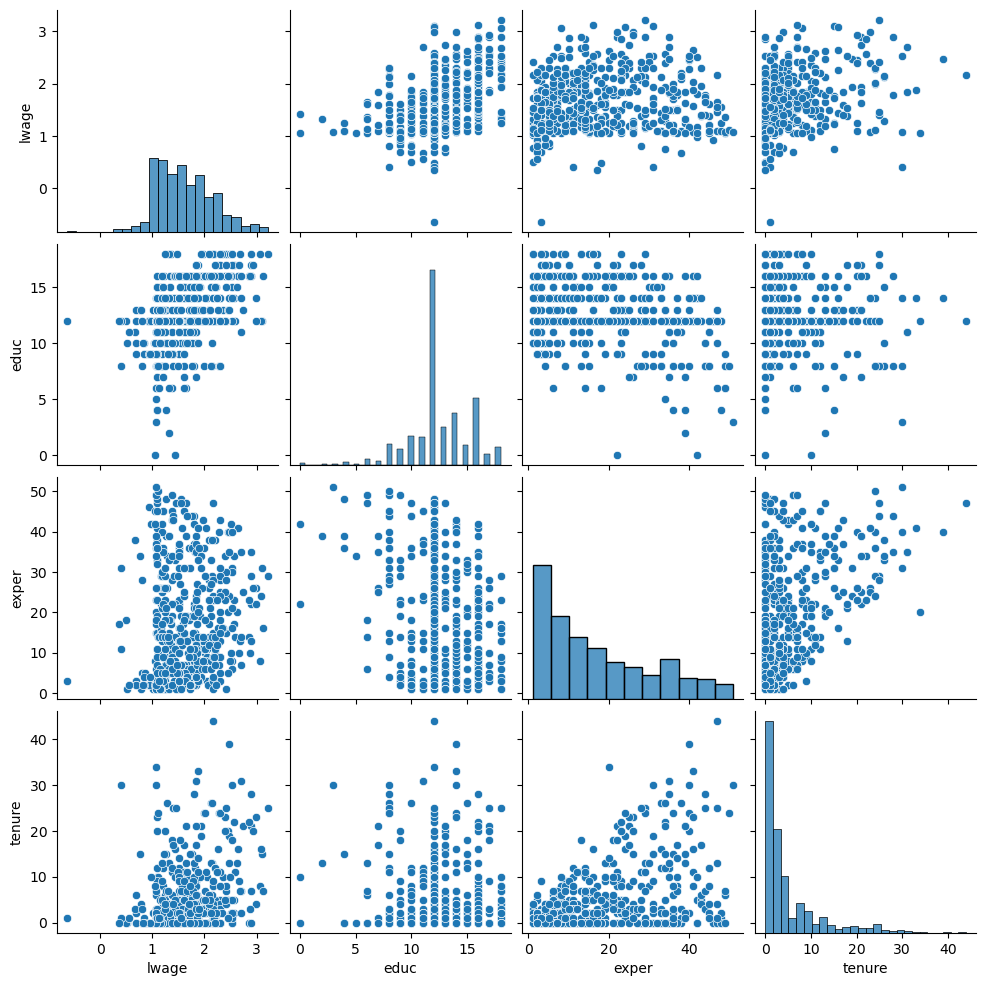

In [63]:
# Basic correlogram
sns.pairplot(wage1[["lwage","educ","exper","tenure"]])
plt.show

In [64]:
# Model 1 
model1 = smf.ols(formula="lwage ~ educ + exper", data=wage1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     86.86
Date:                  周五, 21 2月 2025   Prob (F-statistic):           2.68e-33
Time:                        13:56:01   Log-Likelihood:                -338.01
No. Observations:                 526   AIC:                             682.0
Df Residuals:                     523   BIC:                             694.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2169      0.109      1.997      0.046       0.004       0.430
educ           0.0979      0.008     12.848      0.000       0.083       0.113
exper          0.0103      0.002      6.653      0.000       0.007       0.013
==============================================================================
Omnibus:                        7.740   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                9.485
Skew:                           0.165   Prob(JB):                      0.00872
Kurtosis:                       3.569   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# create a vector of ones in you dataframe that has the size of the dataframe
wage1["ones"]=np.ones(len(wage1))
X_mat = wage1[["ones","educ", "exper"]]
Y = wage1.lwage
# Beta = (X'X)^-1(X'Y)
beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(Y)
# Make it into a dictionary so 
beta_hatd ={"b0":beta_hat[0], "b1":beta_hat[1], "b2":beta_hat[2]}
# predict using coefficients
yhat = X_mat.dot(beta_hat)
# Print betas
print(beta_hatd)

{'b0': 0.2168543778896851, 'b1': 0.09793557331182853, 'b2': 0.01034694789668662}


<font color='blue'>

> To add a quadractic term, use the function **`np.power(x, 2)`**, this way you can include the term directly into the regression instead of creating another series
in your dataframe. 

> You can also add `I(x**2)` to the formula. 
> In both methods if you need to add a higher power you just change the 2 for the number that you need. `I(x**4)` for example if you want $x^4$. See both methods below:
    </font> 

In [66]:
model2 = smf.ols(formula="lwage ~ educ + exper + np.power(exper,2) + tenure", data=wage1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     73.09
Date:                  周五, 21 2月 2025   Prob (F-statistic):           3.81e-49
Time:                        13:56:01   Log-Likelihood:                -296.29
No. Observations:                 526   AIC:                             602.6
Df Residuals:                     521   BIC:                             623.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1983      0.102      1.945      0.052      -0.002       0.399
educ                   0.0853      0.007     11.873      0.000       0.071       0.099
exper                  0.0329      0.005      6.425      0.000       0.023       0.043
np.power(exper, 2)    -0.0007      0.000     -5.945      0.000      -0.001      -0.000
tenure                 0.0208      0.003      6.938      0.000       0.015       0.027
==============================================================================
Omnibus:                       14.093   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               26.057
Skew:                          -0.114   Prob(JB):                     2.20e-06
Kurtosis:                       4.066   Cond. No.                     4.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Make comparing the $R^2$

In [67]:

df = pd.DataFrame([model1.rsquared, model2.rsquared], 
                  index=['R2_m1', 'R2_m2'], columns=['R2'])

# df.style.format('{:,.3f}'.format)
df


,R2
R2_m1,0.249343
R2_m2,0.359461


* For model 1 show predicted values of y given specific values of x : First mean of x, then a specific value of educ= 12 exep = 5 

In [68]:
# If you want to predict for the mean of dependent variables 
means = wage1[["educ","exper"]].mean()
predict1 = model1.predict(means)


print('Model1 \n Predicted y given a value of x \n yhat given x= mean  y_hat = ', 
      round(predict1,5))

# If you want to predict given a specific value of x for example x=0.5
values = {"educ" : [16], "exper":[5]}
print('Model1 \n Predicted y given a value of educ = 16 and exper =5 \n yhat given x is ',model1.predict(values))




Model1 
 Predicted y given a value of x 
 yhat given x= mean  y_hat =  0    1.62327
dtype: float64
Model1 
 Predicted y given a value of educ = 16 and exper =5 
 yhat given x is  0    1.835558
dtype: float64


* For model 2 Show that mean of residuals is equal to zero. save them as a variable in wage1 named u_hat2

In [69]:

# Add abs() for absolute value to eliminate the negative sign in the zero value



print("Mean u_hat =", )

Mean u_hat =


* Show how cov(x, u_hat)~=0 for model 1 

In [70]:
# round and abs() for absolute value to eliminate the negative sign in the zero value

#select the selected first row and second column element of the covariance matrix


covx_u_hat = 



SyntaxError: invalid syntax (3581532284.py, line 6)

 ***
<style>
div.gray { background-color:#dbdbdb; border-radius: 5px; padding: 20px;}
</style>
<div class = "gray">

**Packages used in this document**

` wooldridge as woo
numpy as np
pandas as pd
statsmodels.formula.api as smf`

</div>
&nbsp;
<hr />
<p style="font-family:palatino; text-align: center;font-size: 15px">ECON320 Python Programming Laboratory</a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px">Professor <em> Paloma Lopez de mesa Moyano</em></a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px"><span style="color: #6666FF;"><em>paloma.moyano@emory.edu</em></span></p>

<p style="font-family:palatino; text-align: center;font-size: 15px">Department of Economics</a></p>
<p style="font-family:palatino; text-align: center; color: #012169;font-size: 15px">Emory University</a></p>

&nbsp;

In [1]:
!jupyter nbconvert --to html H5_320Lab_Multiplereg.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'H5_320Lab_Multiplereg.ipynb' matched no files
